# **Mall Customer Segmentation**

### **Problem Statement**
K-Mall keeps information of its customers who subscribe to a membership card. In the membetrship card, they provide following information: gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so the mall has the purchase history of all subscribed members and according to that they compute the spending scores of all customers. We are assigned to segment these customers based on the details given.

### **Business Goal**
You are required to provide a detailed analysis how the segmentation process is performed, how many segments are the customers grouped by and what are the distinct features of each customer segment. These information should help management designed targeted marketing campaigns customized for each customer segment and improve the membership programs they currently have for the mall.

In [1]:
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### **Step 1: Reading and Understanding the Data**

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure and quality of the data

In [2]:
customers = pd.read_csv('data/Mall_Customers.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customers.drop('CustomerID', inplace=True, axis=True)
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [5]:
customers.describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### Inference:
- The dataset contains 200 customers of a mall with a few details about each customer.
- There are 3 numerical and 1 categorical variables in this dataset.
- No missing values are found in this dataset.

### **Step 2 : Exploratory Data Analysis and Visualizations**

Since we only have 4 key features to work with, we will analyze the distribution of each of the numerical features to understand the where most of the datapoints lie. We will also perform further analysis on the relationships between every 2 or more features to discover key insights and information on the dataset.

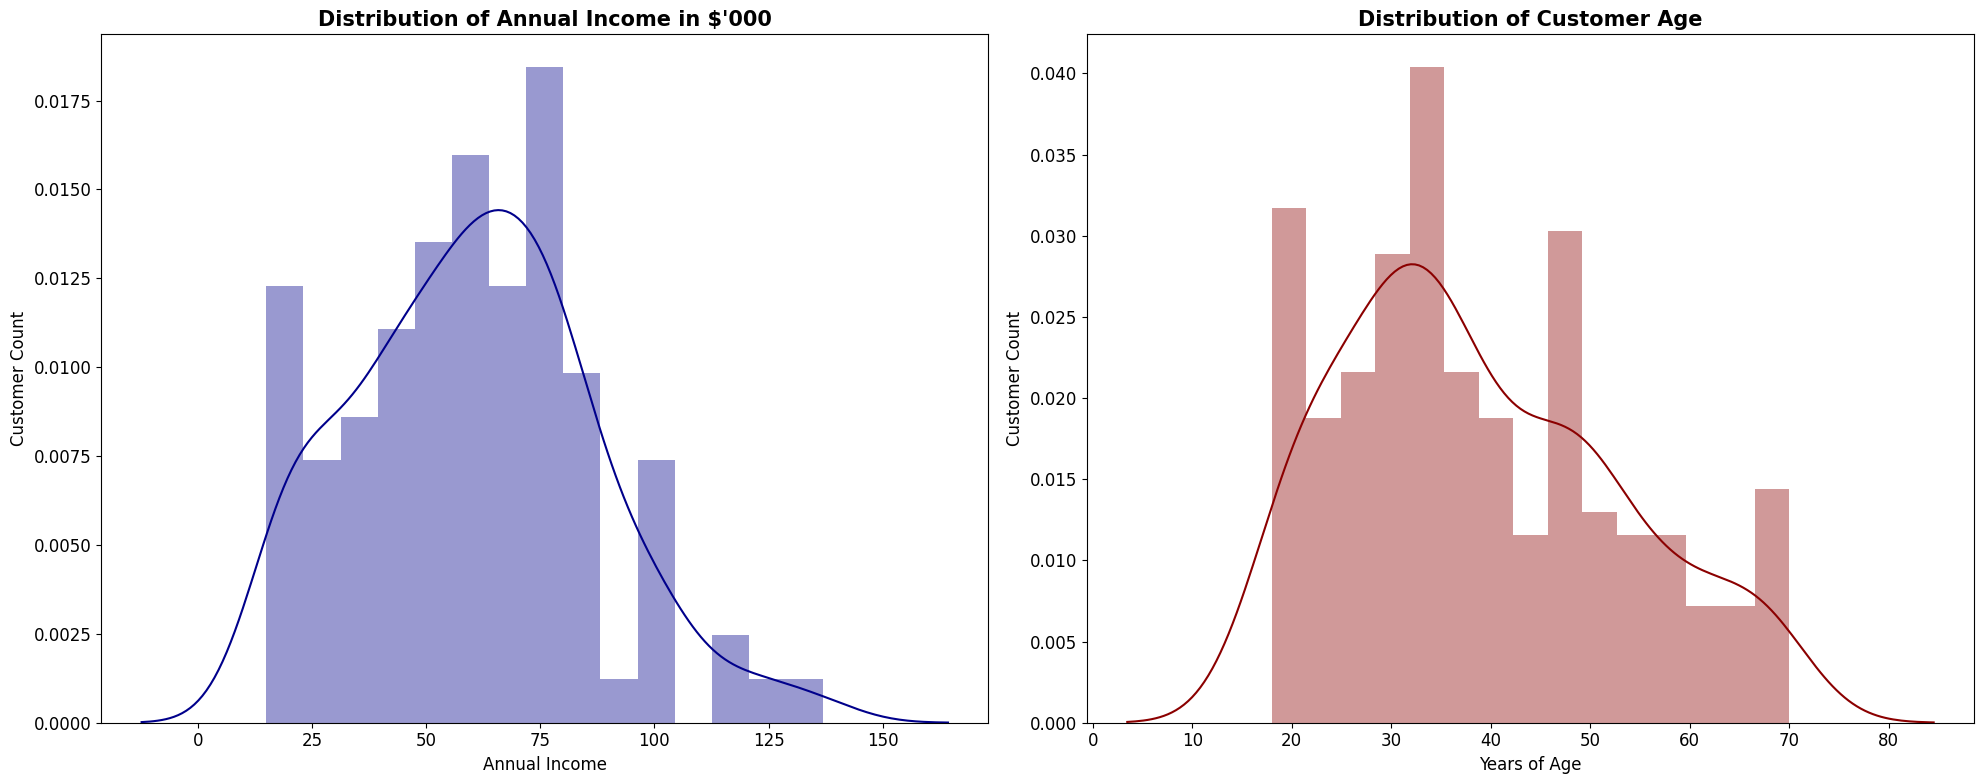

In [7]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 12})

plt.subplot(1,2,1)
sns.distplot(customers['Annual Income (k$)'], color='darkblue', bins = 15)
plt.title("Distribution of Annual Income in $'000", fontsize = 15, fontweight = 'bold')
plt.xlabel('Annual Income')
plt.ylabel('Customer Count')

plt.subplot(1,2,2)
sns.distplot(customers['Age'], color='darkred', bins = 15)
plt.title("Distribution of Customer Age", fontsize = 15, fontweight = 'bold')
plt.xlabel('Years of Age')
plt.ylabel('Customer Count')

plt.tight_layout()
plt.show()

#### Inference:
- From the visualizations above, the annual income of the customers has a right-skewed distribution. We can deduced that majority of the mall's customers has annual incomes within the range of $50k to $80k per year. Though, there are a few customers that makes more than $100k per year.
- The age of customers are also positively-skewed as shown above. The graph shows that the average age of the customer in the mall is about 33, while the a high proportion of the customers are from 20 to 40 years of age.

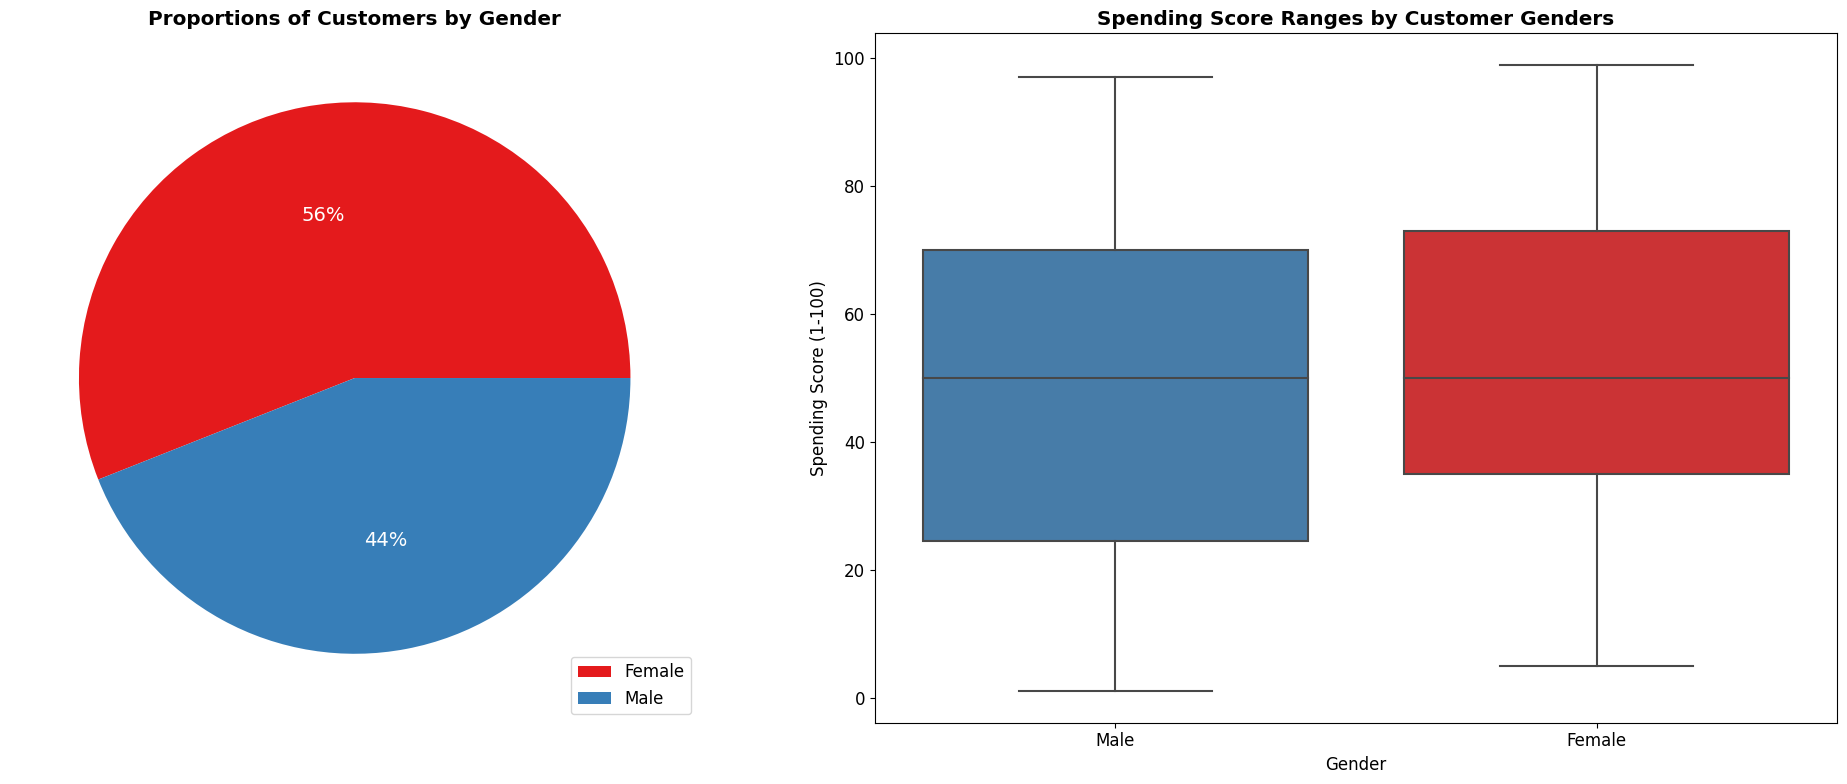

In [12]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 12})

plt.subplot(1,2,1)
pie_data = customers['Gender'].value_counts(ascending=False)
plt.pie(pie_data.values
        , labels = pie_data.index
        , autopct='%.0f%%'
        , colors = sns.color_palette('Set1')[0:2]
        , textprops={'color':'white', 'size' : 14}
        )
plt.title('Proportions of Customers by Gender'
          , fontweight = 'bold')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
ax = sns.boxplot(data= customers, x ='Gender', y= 'Spending Score (1-100)', palette=sns.color_palette('Set1')[0:2][::-1])
ax.set_title("Spending Score Ranges by Customer Genders", fontweight= 'bold')

plt.tight_layout()
plt.show()

#### Inference:
- The dataset contains slightly more female customers than male ones. 
- Being more numerous, both female and male customers has similar spending scores, averaging at about 50.
- From this evaluation, there is no significant difference in spending habits between the genders, at least from this dataset.

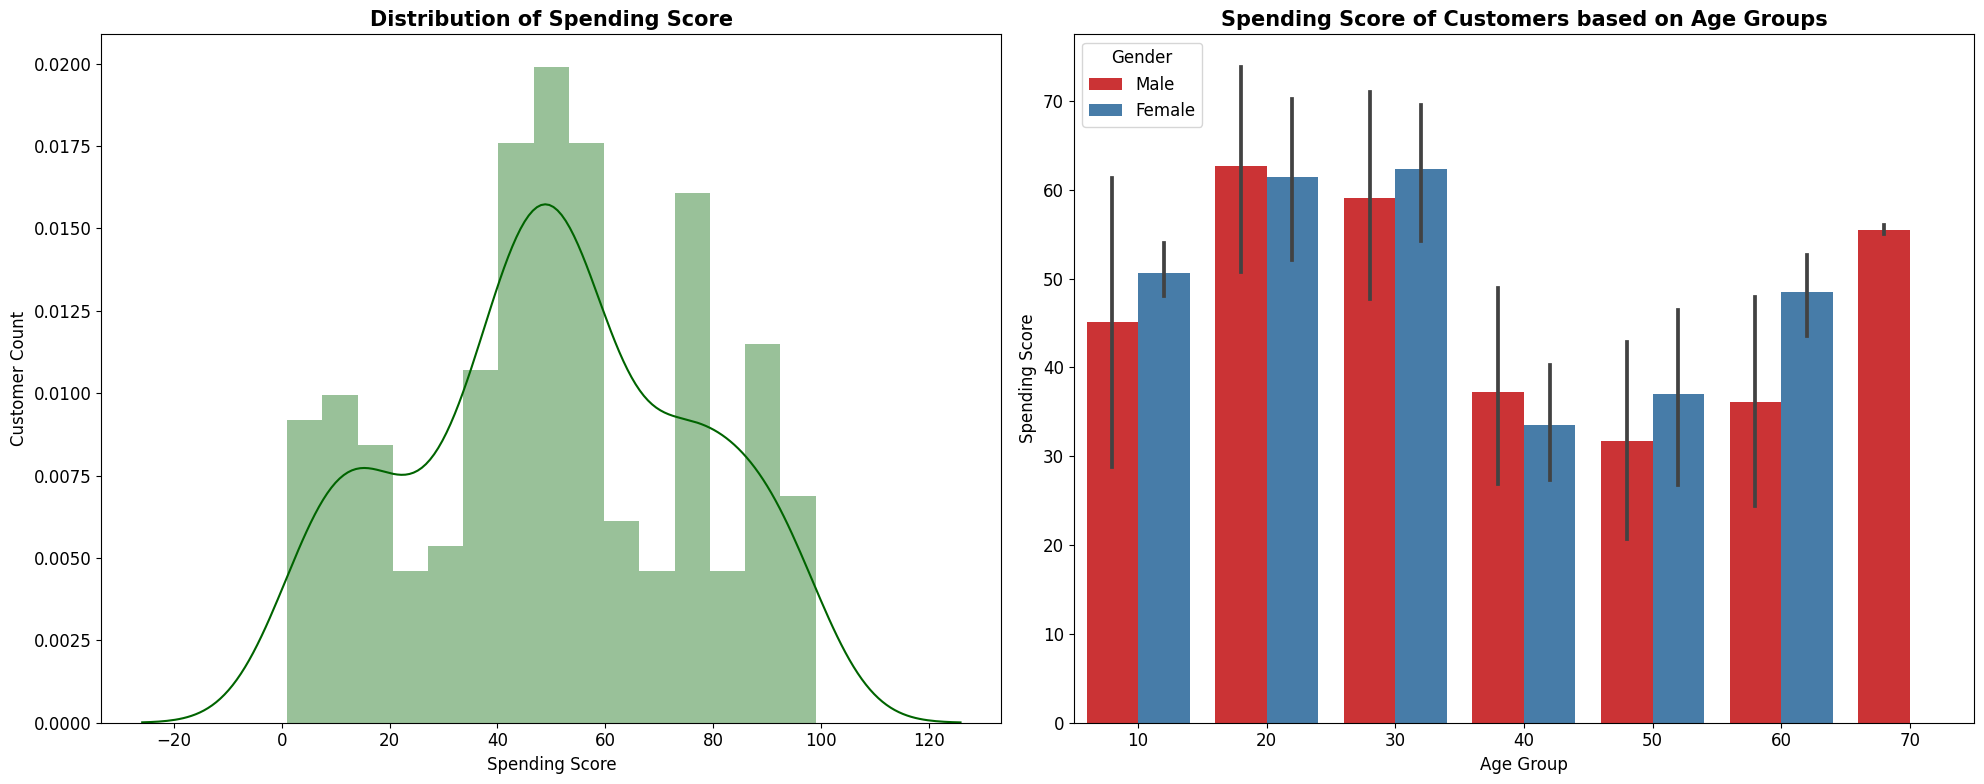

In [13]:
customers['AgeGroup'] = [int(item/10)*10 for item in customers['Age']]

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 12})

plt.subplot(1,2,1)
ax =sns.distplot(customers['Spending Score (1-100)'], color='darkgreen', bins = 15)
plt.title("Distribution of Spending Score", fontsize = 15, fontweight = 'bold')
plt.xlabel('Spending Score')
plt.ylabel('Customer Count')

plt.subplot(1,2,2)
sns.barplot(data=customers
            , x = 'AgeGroup'
            , y = "Spending Score (1-100)"
            , hue = 'Gender'
            , palette=sns.color_palette('Set1')[0:2])
plt.title("Spending Score of Customers based on Age Groups", fontweight = 'bold', fontsize = 15)
plt.xlabel('Age Group')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

#### Inference:
- The spending scores of the customers are shown to be quite normally distributed, with the mean of close to 50.
- From the analysis above, we can also infer that customer within their 20s and 30s exhibits the highest spending scores, averaging about 60.

<Figure size 2000x500 with 0 Axes>

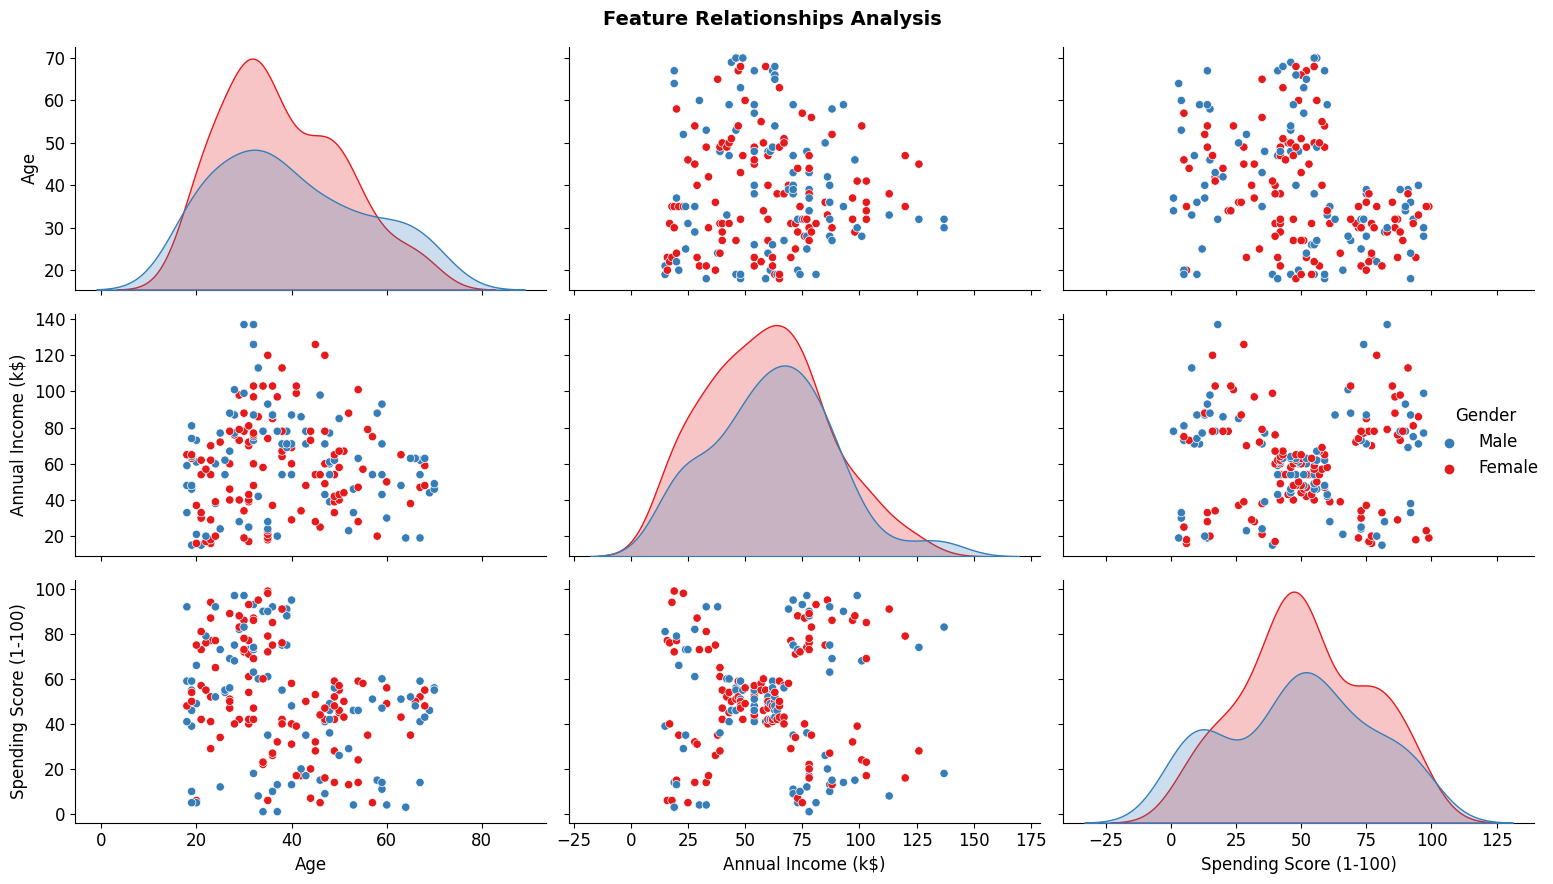

In [10]:
try:
    customers.drop('AgeGroup', axis = True, inplace=True)
except: None

plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 12})
sns.pairplot(customers, height=3, aspect=1.6, hue="Gender", palette=sns.color_palette('Set1')[0:2][::-1])
plt.suptitle("Feature Relationships Analysis", fontweight = 'bold', fontsize =14)

plt.tight_layout()
plt.show()

#### Inference:
- The distribution plots of all three features, separated by `Age`, demonstrates that distribution plots of male customers are generally flatter than those of female customers. This means male customers are more evenly distributed between various spending scores, annual incomes and age groups than females, which tends to consolidate towards the average.
- We also found that there is a unique relationship between two features: `Annual Income (k$)` and `Spending Score (1-100)`, which exposes potential segmentation opportunities.
- Based on the observations derived from the scatterplots, it can be concluded that there are no discernible differentiating characteristics between males and females across various age groups.

### **Step 3: Perform K-Means Clustering**

K-Means clustering is a popular unsupervised machine learning algorithm used for partitioning data into clusters based on similarity. The algorithm aims to divide data points into 'k' clusters, where each data point belongs to the cluster with the nearest mean (centroid). 

We will perform the steps below to illustrate the process:
1. Identify the features to which the data will be clustered upon
2. Choose the number of clusters, or "K", and the centroids to which each data point are assigned.
3. The centroids represents the characteristics of each cluster and the final centroids will be chosen after the final result is given from multiple iterations.
4. Plot the result on a graph to show the different clusters or, in this case, customer segments.

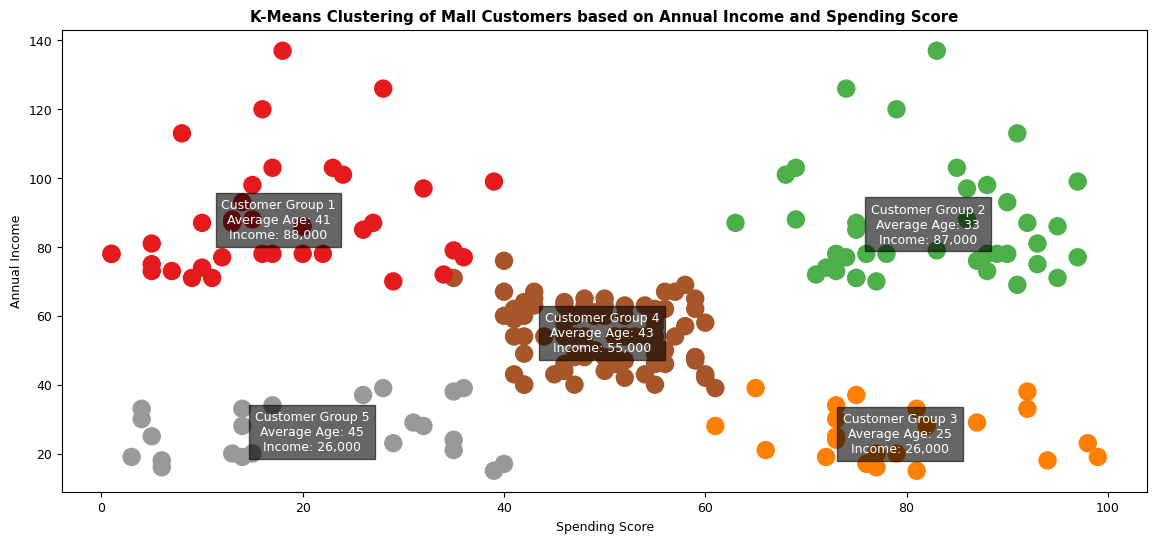

In [11]:
from sklearn.cluster import KMeans

# Data will clustered by using annual income, spending score and age
X = customers[['Annual Income (k$)','Spending Score (1-100)', 'Age']]

# The optimal number of clusters chosen is 5
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
customers['CustomerCluster'] = cluster_labels

# Plot the data points and color them based on their cluster
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 9})
plt.scatter(data = customers
            , x = 'Spending Score (1-100)'
            , y= "Annual Income (k$)"
            , c= "CustomerCluster"
            , cmap='Set1'
            , s=150)

# Plot the details for each cluster
for i in range(n_clusters):
    avg_age = customers.loc[customers['CustomerCluster'] == i, 'Age'].mean()
    avg_income = customers.loc[customers['CustomerCluster'] == i, 'Annual Income (k$)'].mean()
    plt.text(cluster_centers[i, 1]
             , cluster_centers[i, 0]
             , f'Customer Group {i+1}\nAverage Age: {avg_age:.0f}\nIncome: {avg_income:.0f},000'
             , color='white'
             , ha='center'
             , va='center'
             , bbox=dict(facecolor='black', alpha=0.6)
             )

plt.title('K-Means Clustering of Mall Customers based on Annual Income and Spending Score'
          , fontweight='bold')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

#### Results and Takeaways:
- Since there is no significant difference between Male and Female mall customers, the `Gender` feature won't be needed in the clustering process
- The K-Means result shows a clear distinction between each customer segment based on their annual income, average age and spending scores

### **Answering the Business Problem**

Using the K-Means clustering algorithm, we are able to group the 200 customers of K-Mall into five distinct customer segments based on their income, spending behavior, and age:

- Customer Group 1 comprises individuals with high annual income but low spending scores. Their average age is 41, and they are considered conservative shoppers who can afford to spend more but choose not to. To increase sales from this group, targeted marketing campaigns should be developed to influence their buying behavior.
- Customer Group 2 represents the average consumer with moderate income and spending scores. Their average age is 43, and they are the most common segment at K-Mall. Strategies that align with their income levels are likely to be effective, as their spending habits closely correlate with their earnings.
- Customer Group 3 consists of older customers, with an average age of 45, and lower spending scores due to their lower annual incomes. These customers predominantly shop for necessities, and it may not be necessary for K-Mall to heavily focus on this group.
- Customer Group 4 comprises the youngest customers at K-Mall, with an average age of 26 and lower annual incomes (around $26,000 per customer). However, they exhibit a strong desire for shopping, as evidenced by their higher spending scores. As these customers age and their income increases, they are expected to shop even more. Special promotions can be implemented to encourage new buying habits as their income grows.
- Lastly, Customer Group 5 represents K-Mall's top customers, characterized by high annual incomes (averaging $87,000), an average age of 33, and high spending scores. This segment is crucial for K-Mall's success, and management should focus on implementing rewarding programs and incentive structures to maximize their shopping experience and drive greater output from this group.